# Basic Text Analysis

In [1]:
import pandas
from string import ascii_lowercase
from nltk.corpus import stopwords
from collections import Counter
import seaborn

In [2]:
seaborn.set(rc={'figure.figsize':(18, 14)})
seaborn.set(style='whitegrid',
           font_scale=1.7)

top = 20

## Helper Functions

In [3]:
allowed = ascii_lowercase + ' '
print(allowed)

abcdefghijklmnopqrstuvwxyz 


In [4]:
def clean_sentence(sentence):
    new = [char for char in sentence if char in allowed]
    return ''.join(new)

In [5]:
def return_sets(sentence, words_per_set):
    
    offset = words_per_set - 1
    words = sentence.split()
    length = len(words)

    if length >= words_per_set:
        words = [' '.join([words[index] for index in range(x, x + words_per_set)]) for x in range(0, length - offset)]
        unique_words = list(set(words))
        return unique_words

In [6]:
return_sets('This is a sample sentence, to test the return_sets() function. Ha Ha Ha Ha', words_per_set=2)

['This is',
 'sample sentence,',
 'to test',
 'function. Ha',
 'return_sets() function.',
 'test the',
 'Ha Ha',
 'is a',
 'sentence, to',
 'the return_sets()',
 'a sample']

In [7]:
return_sets('This is a sample sentence, to test the return_sets() function.', words_per_set=4)

['test the return_sets() function.',
 'sentence, to test the',
 'This is a sample',
 'is a sample sentence,',
 'sample sentence, to test',
 'to test the return_sets()',
 'a sample sentence, to']

In [8]:
stopwords = stopwords.words('english')

def clean_stopwords(sentence):
    
    cleaned = ' '.join([word for word in sentence.split() if word not in stopwords])
    
    return cleaned

In [9]:
def visualize_counter(counter_object, colour='black'):
    frame = pandas.DataFrame(counter_object)
    frame.columns = ['word', 'count']

    chart = seaborn.barplot(data=frame, y='word', x='count', color=colour)
    return chart

## Import dataset (google company reviews)

In [10]:
data = pandas.read_csv('./raw-data/Womens Clothing E-Commerce Reviews.csv')

In [11]:
# Check the dimensions
data.shape

(23486, 11)

In [12]:
data = data.dropna(axis=0, subset=['Review Text'])

In [13]:
data.shape

(22641, 11)

In [14]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Preprocess
- Convert to lowercase
- Remove chars not in `allowed`
- Remove stop words

In [15]:
# Strip and convert to lower case
target_column = 'review-text'
data[target_column] = data['Review Text'].str.lower().str.strip()
data[target_column] = data[target_column].astype(str)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 12 columns):
Unnamed: 0                 22641 non-null int64
Clothing ID                22641 non-null int64
Age                        22641 non-null int64
Title                      19675 non-null object
Review Text                22641 non-null object
Rating                     22641 non-null int64
Recommended IND            22641 non-null int64
Positive Feedback Count    22641 non-null int64
Division Name              22628 non-null object
Department Name            22628 non-null object
Class Name                 22628 non-null object
review-text                22641 non-null object
dtypes: int64(6), object(6)
memory usage: 2.2+ MB


In [17]:
# Preview 
data[target_column][:5]

0    absolutely wonderful - silky and sexy and comf...
1    love this dress!  it's sooo pretty.  i happene...
2    i had such high hopes for this dress and reall...
3    i love, love, love this jumpsuit. it's fun, fl...
4    this shirt is very flattering to all due to th...
Name: review-text, dtype: object

In [18]:
# Remove unwanted chars
target_column_clean = target_column + '-clean'
data[target_column_clean] = data[target_column].apply(clean_sentence)

In [19]:
# Remove stop words
target_column_final = target_column + '-clean-final'
data[target_column_final] = data[target_column_clean].apply(clean_stopwords)

## Analysis

### Singles

In [20]:
sentences = list(data[target_column_final])
print(sentences[0])

absolutely wonderful silky sexy comfortable


In [21]:
sentence_items = [item.split() for item in sentences]
print(sentence_items[0])

['absolutely', 'wonderful', 'silky', 'sexy', 'comfortable']


In [22]:
items_flat_list = [item for sublist in sentence_items for item in sublist]

In [23]:
# Show total items (words) from the cons feature
len(items_flat_list)

650989

In [24]:
# Show unique items, along with counts
counter = Counter(items_flat_list)

In [25]:
# Show top
single_counter = counter.most_common(top)

for item in single_counter:
    print(item)

('dress', 10429)
('love', 8884)
('size', 8660)
('top', 7289)
('fit', 7195)
('like', 6985)
('wear', 6407)
('great', 6053)
('im', 5925)
('would', 5004)
('fabric', 4732)
('small', 4540)
('color', 4530)
('look', 4001)
('really', 3911)
('ordered', 3824)
('little', 3768)
('perfect', 3719)
('one', 3566)
('flattering', 3459)


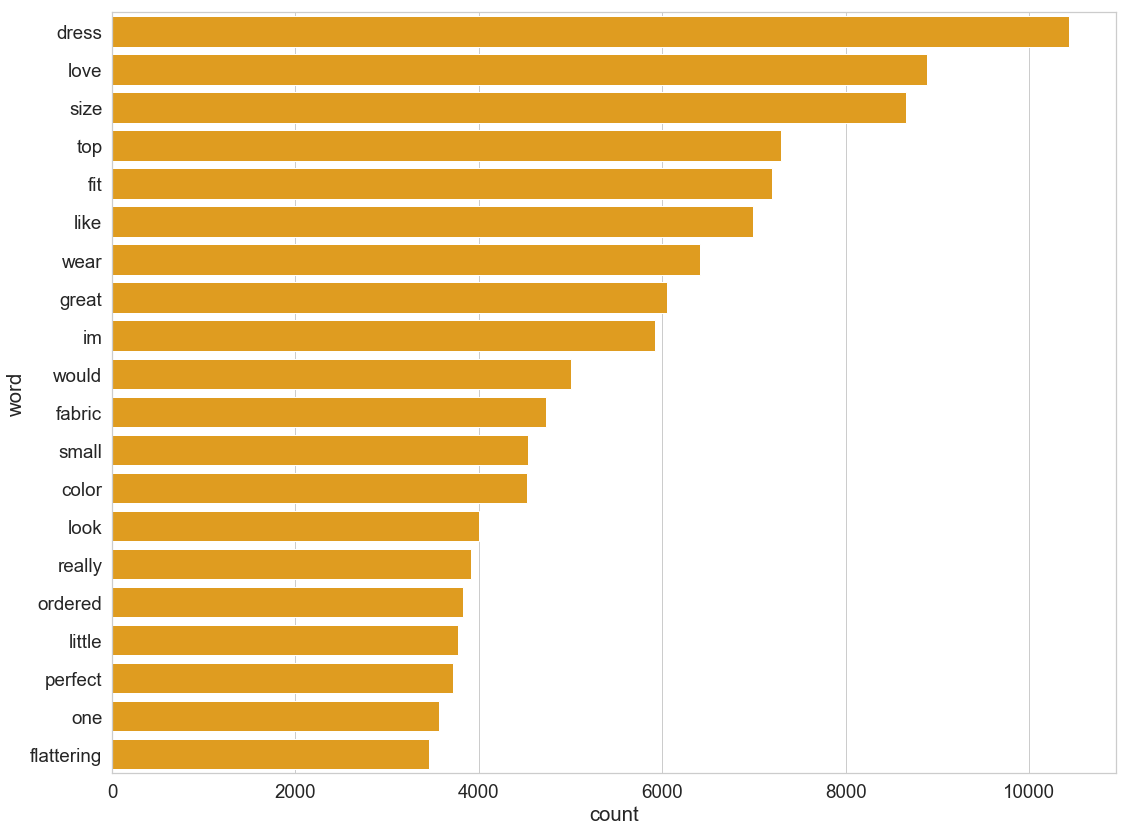

In [26]:
visualize_counter(single_counter, colour='orange')

### Pairs

In [27]:
data['pairs'] = data[target_column_clean].apply(return_sets, args=(2,))

In [28]:
pairs_flat_list = []
for item in data['pairs']:
    if item:
        pairs_flat_list += item

In [29]:
len(pairs_flat_list)

1285812

In [30]:
pairs_flat_list[:10]

['wonderful silky',
 'absolutely wonderful',
 'and comfortable',
 'and sexy',
 'silky and',
 'sexy and',
 'find it',
 'i never',
 'bc i',
 'a little']

In [31]:
pair_counter = Counter(pairs_flat_list)

In [32]:
pair_counts = pair_counter.most_common(top)

for item in pair_counts:
    print(item)

('in the', 5759)
('and the', 4909)
('it is', 4747)
('i am', 4335)
('is a', 3829)
('on the', 3762)
('i love', 3761)
('this dress', 3743)
('of the', 3351)
('and i', 3040)
('and it', 2900)
('a little', 2892)
('it was', 2616)
('this is', 2563)
('i was', 2525)
('i ordered', 2514)
('this top', 2497)
('love the', 2485)
('the fabric', 2416)
('with a', 2402)


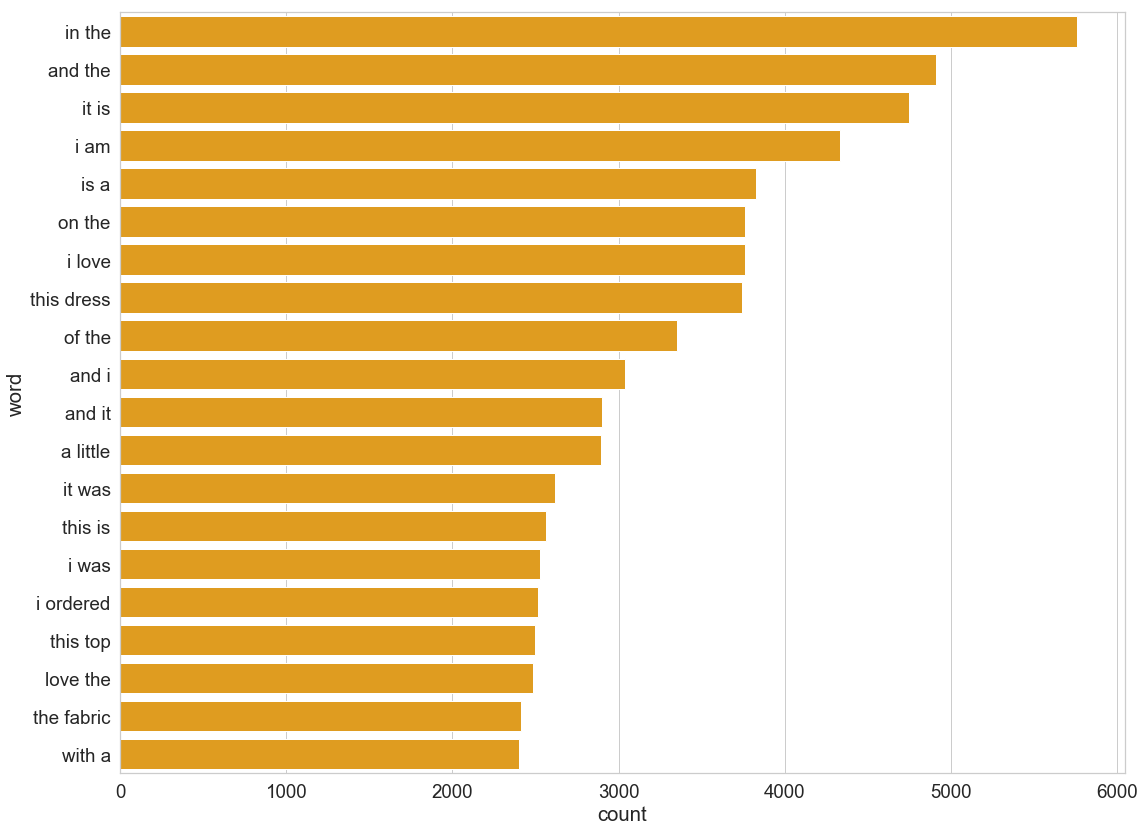

In [33]:
visualize_counter(pair_counts, colour='orange')

### Triplets

In [34]:
data['triplets'] = data[target_column_clean].apply(return_sets, args=(3,))

In [35]:
triplets_flat_list = []
for item in data['triplets']:
    if item:
        triplets_flat_list += item

In [36]:
len(triplets_flat_list)

1290045

In [37]:
triplets_flat_list[:10]

['and sexy and',
 'absolutely wonderful silky',
 'wonderful silky and',
 'sexy and comfortable',
 'silky and sexy',
 'sooo pretty i',
 'find it in',
 'a store and',
 'length on me',
 'in a store']

In [38]:
triplets_counter = Counter(triplets_flat_list)

In [39]:
triplets_counts = triplets_counter.most_common(top)

for item in triplets_counts:
    print(item)

('i love the', 1451)
('true to size', 1249)
('the fabric is', 1233)
('this is a', 1132)
('this dress is', 1047)
('i love this', 1018)
('it is a', 937)
('the material is', 852)
('in the store', 695)
('on the model', 690)
('i am and', 688)
('the fit is', 665)
('i ordered the', 658)
('this top is', 639)
('i had to', 639)
('i bought this', 609)
('the color is', 608)
('i ordered a', 593)
('love this dress', 584)
('tried it on', 561)


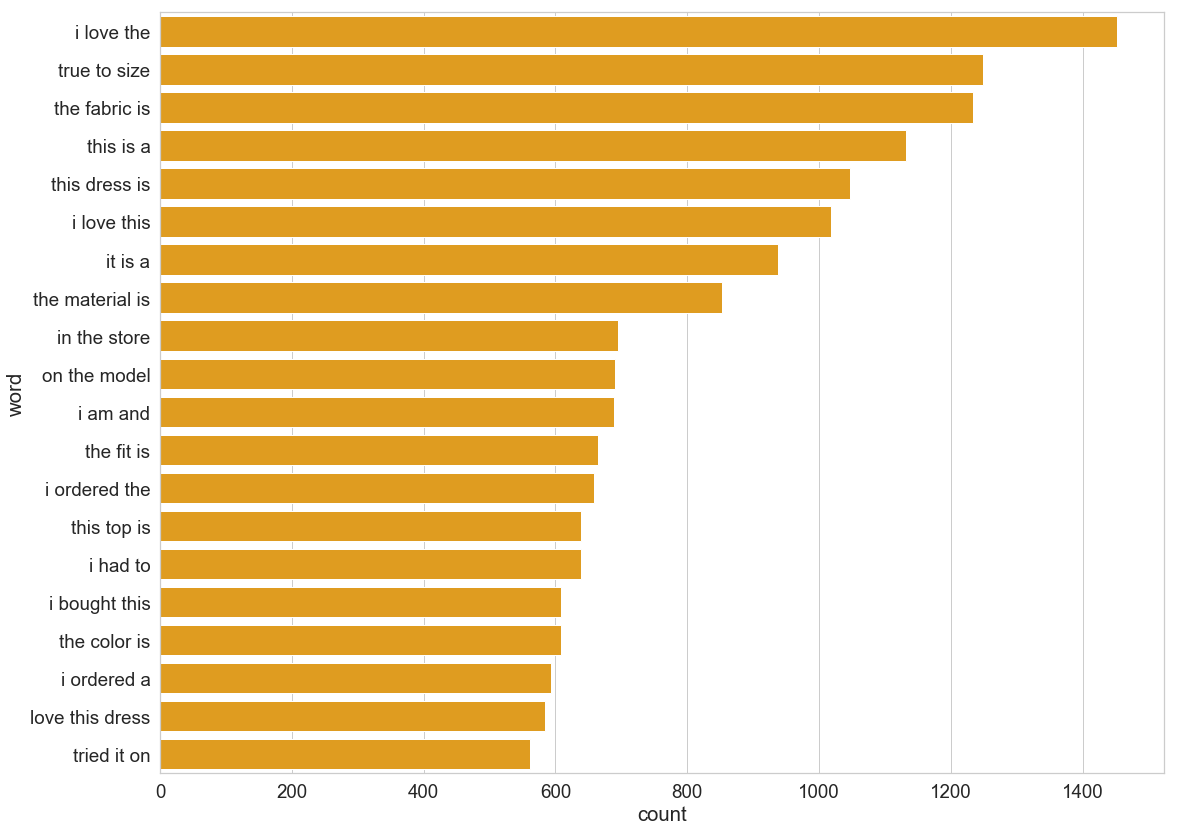

In [40]:
visualize_counter(triplets_counts, colour='orange')

### Quadruples

In [41]:
data['quadruples'] = data[target_column_clean].apply(return_sets, args=(4,))

In [42]:
quadruples_flat_list = []
for item in data['quadruples']:
    if item:
        quadruples_flat_list += item

In [43]:
len(quadruples_flat_list)

1270508

In [44]:
quadruples_flat_list[:10]

['wonderful silky and sexy',
 'silky and sexy and',
 'and sexy and comfortable',
 'absolutely wonderful silky and',
 'petite i bought a',
 'definitely be a true',
 'a petite and am',
 'bc its petite i',
 'would definitely be a',
 'ordered it online bc']

In [45]:
quadruples_counter = Counter(quadruples_flat_list)

In [46]:
quadruples_counts = quadruples_counter.most_common(top)

for item in quadruples_counts:
    print(item)

('i tried it on', 428)
('i usually wear a', 336)
('can be dressed up', 276)
('be dressed up or', 274)
('i love this dress', 266)
('dressed up or down', 262)
('fits true to size', 249)
('wanted to love this', 235)
('in the store and', 225)
('cant wait to wear', 218)
('is true to size', 202)
('this is a great', 202)
('true to size i', 201)
('to try it on', 200)
('for reference i am', 199)
('true to size and', 196)
('i am usually a', 195)
('i am lbs and', 194)
('i love this top', 193)
('and i love the', 188)


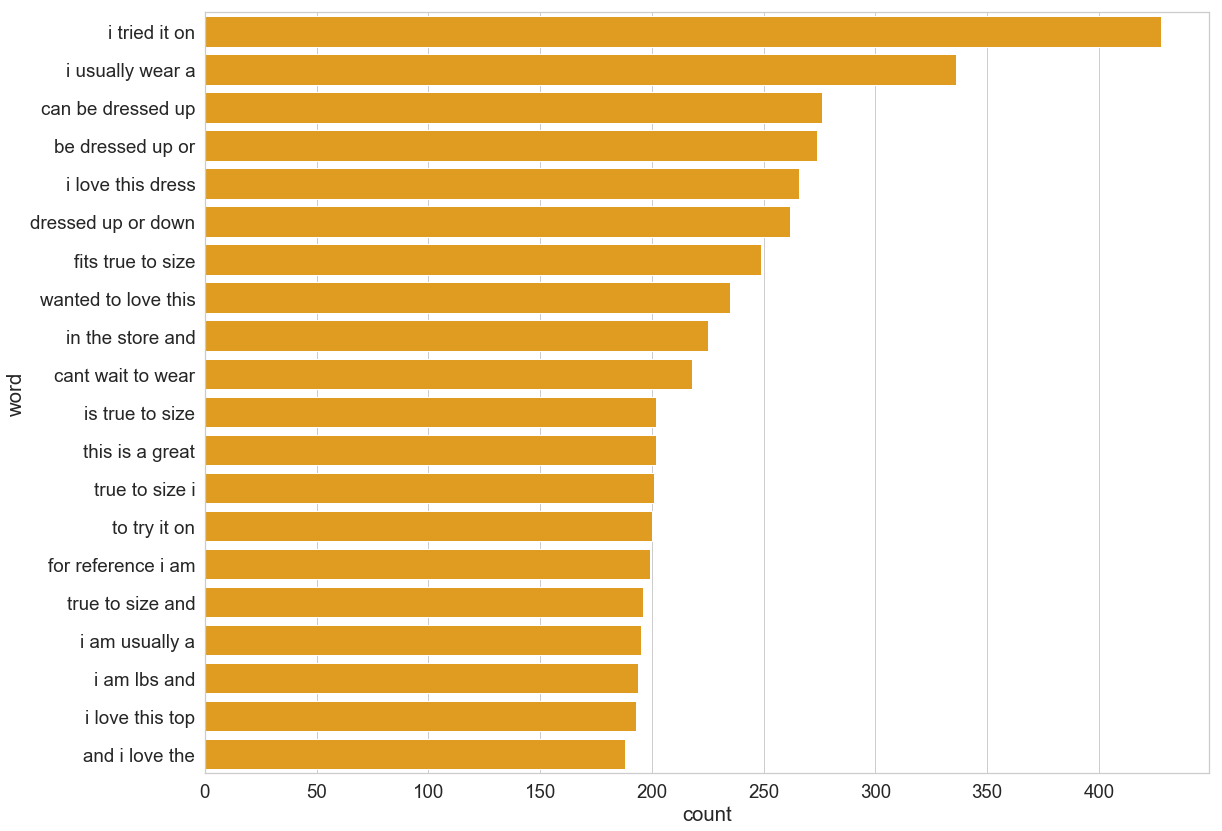

In [47]:
visualize_counter(quadruples_counts, colour='orange')

### Quints

In [48]:
data['quints'] = data[target_column_clean].apply(return_sets, args=(5,))

In [49]:
quints_flat_list = []
for item in data['quints']:
    if item:
        quints_flat_list += item

In [50]:
len(quints_flat_list)

1248439

In [51]:
quints_flat_list[:10]

['absolutely wonderful silky and sexy',
 'wonderful silky and sexy and',
 'silky and sexy and comfortable',
 'love this dress its sooo',
 'just a little below the',
 'would definitely be a true',
 'hits just a little below',
 'and am i love the',
 'it online bc its petite',
 'a little below the knee']

In [52]:
quints_counter = Counter(quints_flat_list)

In [53]:
quints_counts = quints_counter.most_common(top)

for item in quints_counts:
    print(item)

('be dressed up or down', 220)
('can be dressed up or', 212)
('when i tried it on', 154)
('cant wait to wear it', 134)
('i wanted to love this', 131)
('i cant wait to wear', 102)
('the fabric is soft and', 101)
('it fits true to size', 96)
('i fell in love with', 96)
('fit is true to size', 88)
('i agree with the other', 85)
('i had to return it', 85)
('wanted to love this dress', 82)
('i was so excited to', 80)
('i really wanted to love', 80)
('it does on the model', 79)
('i usually wear a size', 79)
('it can be dressed up', 75)
('i thought it would be', 74)
('fell in love with this', 72)


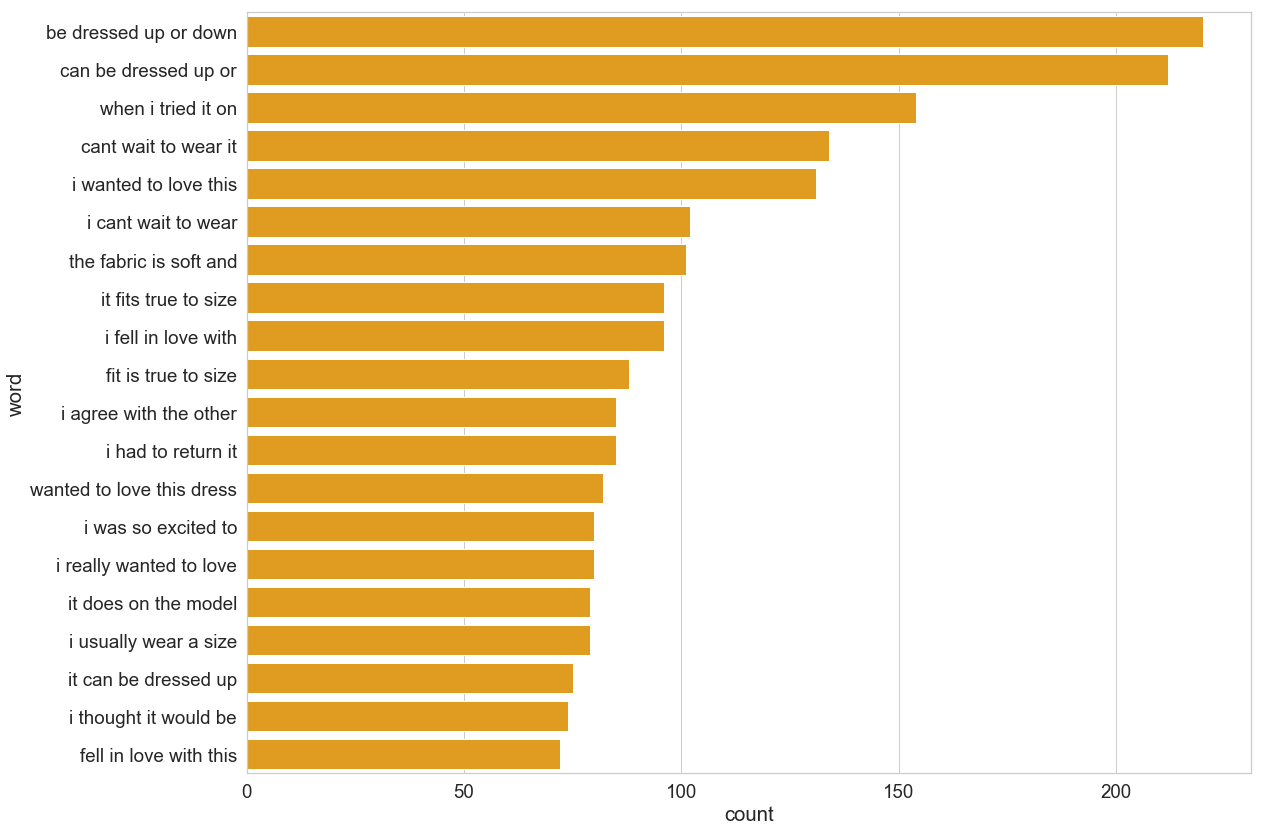

In [54]:
visualize_counter(quints_counts, colour='orange')

### Categorizing terms
- Break down sentence into 'tokens' or singular items
- Categorize using `pos_tag()` method from `nltk`
- Aggregate tags and do routine analysis

In [55]:
import nltk

In [56]:
data['tokenized'] = data[target_column_clean].apply(nltk.word_tokenize)

In [57]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,review-text,review-text-clean,review-text-clean-final,pairs,triplets,quadruples,quints,tokenized
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky and sexy and comfo...,absolutely wonderful silky sexy comfortable,"[wonderful silky, absolutely wonderful, and co...","[and sexy and, absolutely wonderful silky, won...","[wonderful silky and sexy, silky and sexy and,...","[absolutely wonderful silky and sexy, wonderfu...","[absolutely, wonderful, silky, and, sexy, and,..."
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,love this dress! it's sooo pretty. i happene...,love this dress its sooo pretty i happened t...,love dress sooo pretty happened find store im ...,"[find it, i never, bc i, a little, would defin...","[sooo pretty i, find it in, a store and, lengt...","[petite i bought a, definitely be a true, a pe...","[love this dress its sooo, just a little below...","[love, this, dress, its, sooo, pretty, i, happ..."
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,i had such high hopes for this dress and reall...,i had such high hopes for this dress and reall...,high hopes dress really wanted work initially ...,"[bottom half, under layer, had such, very tigh...","[i initially ordered, to be outrageously, but ...","[size but i found, just ok overall the, over l...","[the petite small my usual, and really wanted ...","[i, had, such, high, hopes, for, this, dress, ..."
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"i love, love, love this jumpsuit. it's fun, fl...",i love love love this jumpsuit its fun flirty ...,love love love jumpsuit fun flirty fabulous ev...,"[flirty and, fun flirty, fabulous every, and f...","[every time i, fun flirty and, nothing but gre...","[fun flirty and fabulous, i get nothing but, i...","[time i wear it i, i wear it i get, fabulous e...","[i, love, love, love, this, jumpsuit, its, fun..."
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,this shirt is very flattering to all due to th...,this shirt is very flattering to all due to th...,shirt flattering due adjustable front tie perf...,"[any cardigan, with any, is the, length to, we...","[pairs well with, this shirt is, with leggings...","[and it is sleeveless, any cardigan love this,...","[is very flattering to all, with leggings and ...","[this, shirt, is, very, flattering, to, all, d..."


In [58]:
flattened_tokens = [item for sublist in data['tokenized'][:100] for item in sublist]

In [59]:
len(flattened_tokens)

6185

In [78]:
flattened_tokens[:10]

['absolutely',
 'wonderful',
 'silky',
 'and',
 'sexy',
 'and',
 'comfortable',
 'love',
 'this',
 'dress']

In [62]:
tokens_categories = [nltk.pos_tag([item]) for item in flattened_tokens]

In [63]:
token_data = pandas.DataFrame(tokens_categories)

In [77]:
token_data.head()

,0
0,"(absolutely, RB)"
1,"(wonderful, NN)"
2,"(silky, NN)"
3,"(and, CC)"
4,"(sexy, NN)"


In [66]:
token_data_final = pandas.DataFrame(token_data[0].values.tolist())

In [68]:
token_data_final.head()

,0,1
0,absolutely,RB
1,wonderful,NN
2,silky,NN
3,and,CC
4,sexy,NN


In [69]:
token_data_final.columns = ['word', 'category']

In [70]:
token_data_final.head()

,word,category
0,absolutely,RB
1,wonderful,NN
2,silky,NN
3,and,CC
4,sexy,NN


In [72]:
token_data_final.groupby('category').count()

,word
category,
CC,334
CD,16
DT,702
IN,666
JJ,317
JJR,15
JJS,8
MD,92
NN,1909


In [76]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or